#Handwritten Character Recognition

##importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
!pip install extra_keras_datasets
from extra_keras_datasets import emnist
(x_train, y_train), (x_test, y_test) = emnist.load_data(type='letters')

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

INFO:root:Loading dataset = emnist


743915520/743900280 [==============================] - 13s 0us/step


(((124800, 28, 28), (124800,)), ((20800, 28, 28), (20800,)))

   label
0     23
1      7
2     16


<BarContainer object of 26 artists>

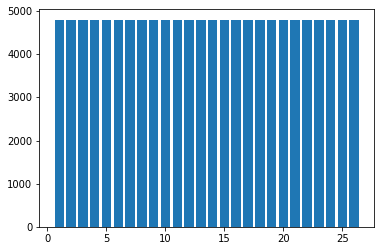

In [3]:
y=pd.DataFrame(y_train, columns=['label'])
print(y.head(3))
plt.bar(x=y['label'].unique(),height=y.value_counts())

23

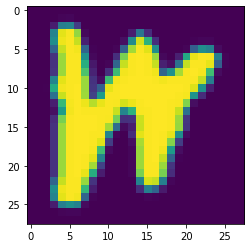

In [4]:
plt.imshow(x_train[0,:,:])
y_train[0]

In [5]:
x_train.min(), x_train.max()

(0, 255)

##ml model

In [ ]:
x=x_train.reshape([x_train.shape[0],-1])
x_t=x_test.reshape([x_test.shape[0],-1])

x=x/255.
x_t=x_t/255.

x.shape, x_t.shape

((124800, 784), (20800, 784))

###rfc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid=RandomForestClassifier(max_depth=100,n_estimators=1000)

#grid = GridSearchCV(rfc, param_grid=parameters, cv=5)
grid.fit(x, y_train)

#print("best parameters from train data: ",grid.best_params_)
print("train accuracy",grid.score(x, y_train))
print("test accuracy",grid.score(x_t, y_test))

train accuracy 1.0
test accuracy 0.8907211538461538


In [ ]:
y_pred = grid.predict(x_t)
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[710,   4,   2,   4,   4,   4,   7,  12,   0,   0,   3,   1,   2,
          7,   8,   2,  17,   2,   0,   0,   1,   0,   2,   0,   0,   8],
       [  8, 743,   1,   3,   2,   1,   7,  10,   0,   3,   0,   3,   0,
          1,   5,   1,   1,   2,   0,   2,   0,   0,   0,   0,   0,   7],
       [  3,   0, 734,   2,  26,   0,   1,   0,   0,   0,   2,   5,   0,
          2,   6,   4,   1,   7,   0,   2,   3,   0,   1,   1,   0,   0],
       [  9,  11,   0, 706,   0,   1,   0,   2,   0,   5,   2,   2,   1,
          3,  44,   2,   3,   0,   1,   2,   1,   1,   3,   0,   0,   1],
       [  8,   1,  16,   0, 741,   2,   4,   0,   1,   1,   0,   2,   0,
          0,   6,   3,   1,   7,   0,   2,   0,   0,   2,   1,   0,   2],
       [  1,   1,   1,   2,   2, 728,   1,   0,   4,   1,   0,   2,   0,
          0,   0,  32,   2,   1,   2,  16,   0,   0,   0,   0,   3,   1],
       [ 28,  19,  12,   1,   3,   7, 560,   3,   1,  10,   1,   0,   0,
          1,   4,   1, 130,   1,  10,   2,   

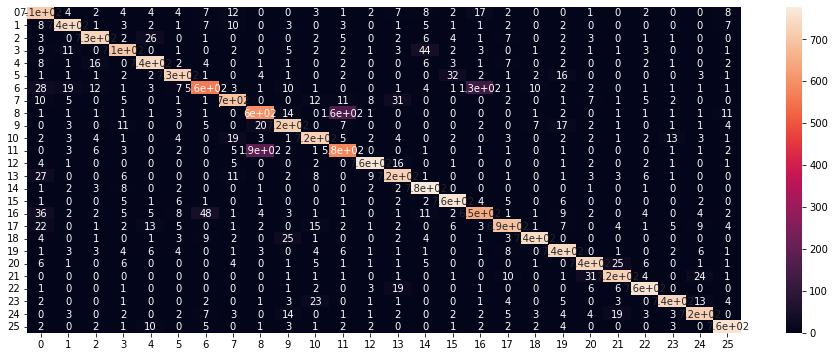

In [ ]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(matrix,annot=True)
plt.show()

###svc

In [ ]:
from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV

grid=SVC(kernel='poly',C=0.001,gamma=1)
#parameters = {'C':[0.001,0.1], 'gamma':[1]}

#grid = GridSearchCV(svc, param_grid=parameters, cv=5)
grid.fit(x, y_train)

#print("best parameters from train data: ",grid.best_params_)
print("train accuracy",grid.score(x, y_train))
print("test accuracy",grid.score(x_t, y_test))

train accuracy 0.9950080128205128
test accuracy 0.9055769230769231


In [ ]:
y_pred = grid.predict(x_t)
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[740,   2,   3,  10,   1,   0,   6,   7,   1,   0,   0,   0,   0,
          5,   4,   2,  12,   0,   1,   0,   1,   0,   1,   2,   0,   2],
       [  7, 749,   0,   3,   4,   1,   7,   9,   1,   1,   0,   4,   1,
          1,   3,   1,   1,   1,   0,   0,   0,   1,   0,   0,   0,   5],
       [  0,   1, 755,   2,  19,   0,   2,   0,   0,   1,   0,   5,   0,
          0,   4,   0,   0,   5,   2,   1,   1,   0,   1,   0,   1,   0],
       [ 10,   5,   2, 736,   0,   1,   3,   1,   1,   4,   0,   1,   1,
          1,  22,   3,   3,   1,   0,   0,   3,   0,   0,   0,   2,   0],
       [  6,   4,  26,   0, 742,   2,   2,   0,   1,   0,   1,   3,   0,
          0,   1,   1,   3,   3,   1,   2,   1,   0,   0,   0,   0,   1],
       [  1,   1,   0,   0,   2, 745,   3,   0,   1,   0,   0,   3,   0,
          0,   0,  16,   0,   5,   3,  17,   0,   1,   0,   0,   0,   2],
       [ 21,  11,   6,   2,   4,   5, 619,   1,   1,   7,   0,   2,   0,
          2,   3,   0, 103,   1,   6,   0,   

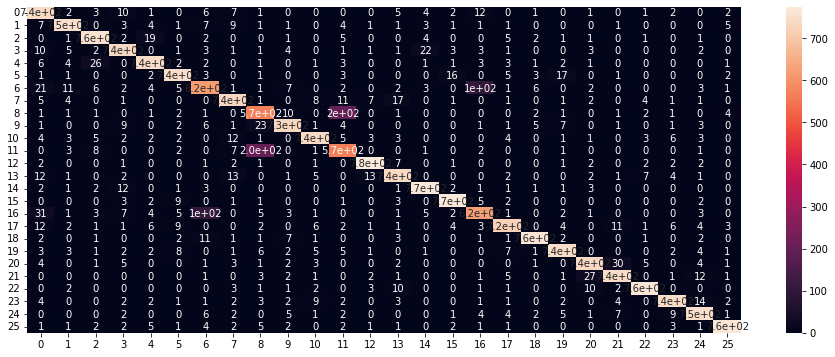

In [ ]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(matrix,annot=True)
plt.show()

##model cnn

In [6]:
x_train=x_train.reshape([-1,28,28,1])
x_test=x_test.reshape([-1,28,28,1])
y_train=y_train.reshape([-1,1])
y_test=y_test.reshape([-1,1])

x_train=x_train/255.0
x_test=x_test/255.0

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((124800, 28, 28, 1), (124800, 1)), ((20800, 28, 28, 1), (20800, 1)))

In [7]:
from sklearn.preprocessing import OneHotEncoder
y_train=OneHotEncoder().fit_transform(y_train).toarray()
y_test=OneHotEncoder().fit_transform(y_test).toarray()
y_train, y_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), (124800, 26))

In [8]:
from keras.models import Sequential
from keras.layers import *
from keras import backend as K

model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3),activation='relu',input_shape=[28,28,1]))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [9]:
hist = model.fit(x_train,y_train,batch_size=64,epochs=15,
                 validation_split=0.4)

Epoch 1/15
1170/1170 [==============================] - 30s 15ms/step - loss: 0.6844 - accuracy: 0.7901 - val_loss: 0.3051 - val_accuracy: 0.9032
Epoch 2/15
1170/1170 [==============================] - 19s 16ms/step - loss: 0.3619 - accuracy: 0.8828 - val_loss: 0.2474 - val_accuracy: 0.9188
Epoch 3/15
1170/1170 [==============================] - 19s 16ms/step - loss: 0.2985 - accuracy: 0.9017 - val_loss: 0.2296 - val_accuracy: 0.9277
Epoch 4/15
1170/1170 [==============================] - 19s 16ms/step - loss: 0.2560 - accuracy: 0.9128 - val_loss: 0.2173 - val_accuracy: 0.9307
Epoch 5/15
1170/1170 [==============================] - 16s 14ms/step - loss: 0.2294 - accuracy: 0.9215 - val_loss: 0.2091 - val_accuracy: 0.9323
Epoch 6/15
1170/1170 [==============================] - 18s 16ms/step - loss: 0.2063 - accuracy: 0.9270 - val_loss: 0.2142 - val_accuracy: 0.9329
Epoch 7/15
1170/1170 [==============================] - 18s 16ms/step - loss: 0.1885 - accuracy: 0.9337 - val_loss: 0.2038 -

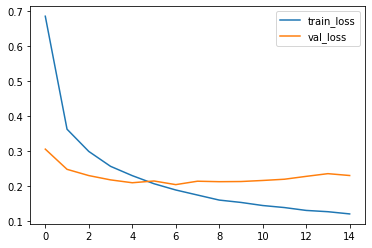

In [10]:
plt.plot(hist.history['loss'],label='train_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

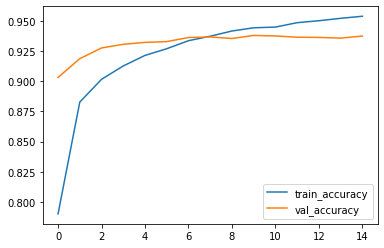

In [11]:
plt.plot(hist.history['accuracy'],label='train_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [12]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

'test accuracy:',model.evaluate(x_test, y_test)[1]*100,'loss:',model.evaluate(x_test, y_test)[0]

650/650 [==============================] - 3s 5ms/step - loss: 0.2317 - accuracy: 0.9369


('test accuracy:', 93.68749856948853, 'loss:', 0.23172514140605927)

In [13]:
y_test=np.argmax(y_test,axis=1)
a=confusion_matrix(y_test,y_pred)
a

array([[777,   1,   2,   4,   0,   0,   2,   2,   0,   0,   1,   0,   0,
          1,   0,   1,   3,   1,   0,   0,   1,   0,   0,   0,   0,   4],
       [  1, 774,   0,   3,   1,   0,   4,   8,   0,   0,   0,   1,   0,
          1,   2,   0,   0,   2,   0,   0,   1,   0,   0,   0,   0,   2],
       [  0,   0, 771,   1,  14,   0,   1,   0,   0,   0,   0,   6,   0,
          0,   0,   1,   0,   2,   0,   0,   3,   0,   0,   0,   0,   1],
       [ 11,   4,   0, 742,   0,   0,   0,   0,   0,   2,   0,   1,   0,
          1,  31,   3,   1,   0,   0,   2,   1,   0,   1,   0,   0,   0],
       [  1,   0,   6,   0, 778,   1,   2,   0,   1,   2,   0,   1,   0,
          0,   0,   2,   0,   1,   0,   4,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1,   2, 761,   4,   2,   2,   0,   1,   0,   0,
          0,   0,   3,   0,   3,   3,  16,   0,   0,   0,   0,   1,   0],
       [ 25,   5,   6,   1,   3,   1, 640,   0,   0,   1,   1,   1,   0,
          1,   0,   1, 106,   0,   5,   0,   

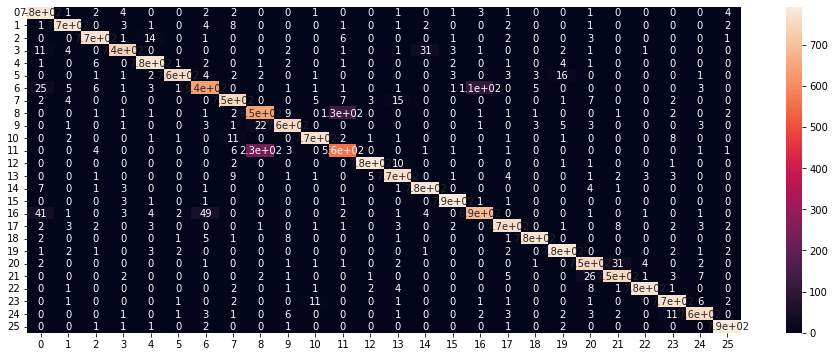

In [14]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(a,annot=True)
plt.show()